# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
##This is most similar to Day 2 Activity 5
## create an empty list, loop through the cities list from previous cell calling the 
##url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
## remember not all cities will be present so be sure to try: except:
##for extra finesse you could break this list down into smaller blocks and run it (optional)

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial"
#url was giving me an error on my API key, but I looked up issues with the url
#https://github.com/crossminer/scava/issues/432
#added a query for a specific city and that seems to work
city_url = url + "&q=" + 'Irvine' + "APPID=" + weather_api_key
response = requests.get(city_url).json()
pprint(response)


{'cod': 401,
 'message': 'Invalid API key. Please see '
            'http://openweathermap.org/faq#error401 for more info.'}


In [4]:
lat = []
lng = []
cloud = []
date = []
humidity = []
max_temp = []
min_temp = []
wind_speed = []
name = []
country = []


for city in cities:
    try:
        response = requests.get(url+"&q="+city+"&appid="+weather_api_key).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        cloud.append(response["clouds"]["all"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        min_temp.append(response["main"]["temp_min"])
        name.append(response["name"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])

    except:
        print("City not present")
        
    continue

#to test if it started off successfully
name[:5]

City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not present
City not prese

['Eyl', 'Rikitea', 'Atuona', "Tegul'det", 'Saint-Philippe']

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
##remember the output of the previous cell is an array
weathermap_df = pd.DataFrame({
    "City": name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date    
})
weathermap_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.9803,49.8164,76.05,72,0,23.51,SO,1661476347
1,Rikitea,-23.1203,-134.9692,66.85,61,79,22.84,PF,1661476347
2,Atuona,-9.8000,-139.0333,76.89,70,2,13.00,PF,1661476347
3,Tegul'det,57.3064,88.1667,52.95,95,100,6.22,RU,1661476348
4,Saint-Philippe,-21.3585,55.7679,65.79,80,27,10.22,RE,1661476348


In [6]:
## this is accomplished with one of the functions from Pandas day1 activities 5&6
weathermap_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.124457,12.570187,68.282297,72.242315,54.934901,7.415515,1.661476e+09
std,33.005506,93.316331,13.064405,19.548042,41.437478,4.970123,8.200239e+01
min,-54.800000,-175.200000,33.350000,8.000000,0.000000,0.000000,1.661476e+09
25%,-8.623100,-69.363200,58.890000,63.000000,11.000000,3.530000,1.661476e+09
50%,22.285500,14.532900,70.270000,77.000000,60.000000,6.330000,1.661476e+09
75%,47.166600,100.321300,78.150000,86.000000,100.000000,10.270000,1.661476e+09
max,78.218600,179.316700,102.420000,100.000000,100.000000,26.980000,1.661477e+09


In [7]:
weathermap_df.to_csv('weathermap_df.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
##use loc to filter
high_humidity_df = weathermap_df.loc[weathermap_df["Humidity"] > 100]
high_humidity_df

#there are no cities where humidity > 100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
not_so_high_humidity_df = weathermap_df.loc[weathermap_df["Humidity"] <= 100]
not_so_high_humidity_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.9803,49.8164,76.05,72,0,23.51,SO,1661476347
1,Rikitea,-23.1203,-134.9692,66.85,61,79,22.84,PF,1661476347
2,Atuona,-9.8000,-139.0333,76.89,70,2,13.00,PF,1661476347
3,Tegul'det,57.3064,88.1667,52.95,95,100,6.22,RU,1661476348
4,Saint-Philippe,-21.3585,55.7679,65.79,80,27,10.22,RE,1661476348
...,...,...,...,...,...,...,...,...,...
548,Evensk,61.9500,159.2333,60.44,60,72,11.63,RU,1661476555
549,Wewak,-3.5534,143.6268,83.01,75,16,5.30,PG,1661476555
550,Sola,-13.8833,167.5500,79.99,73,20,22.15,VU,1661476556
551,Buala,-8.1450,159.5921,83.46,73,71,8.43,SB,1661476556


In [10]:
weathermap_df

#the row count on the not_so_high_humidity_df matches the row count on the weathermap_df
#therefore no action needed.

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Eyl,7.9803,49.8164,76.05,72,0,23.51,SO,1661476347
1,Rikitea,-23.1203,-134.9692,66.85,61,79,22.84,PF,1661476347
2,Atuona,-9.8000,-139.0333,76.89,70,2,13.00,PF,1661476347
3,Tegul'det,57.3064,88.1667,52.95,95,100,6.22,RU,1661476348
4,Saint-Philippe,-21.3585,55.7679,65.79,80,27,10.22,RE,1661476348
...,...,...,...,...,...,...,...,...,...
548,Evensk,61.9500,159.2333,60.44,60,72,11.63,RU,1661476555
549,Wewak,-3.5534,143.6268,83.01,75,16,5.30,PG,1661476555
550,Sola,-13.8833,167.5500,79.99,73,20,22.15,VU,1661476556
551,Buala,-8.1450,159.5921,83.46,73,71,8.43,SB,1661476556


In [11]:
#  Get the indices of cities that have humidity over 100%.
## it's the same loc with .index appended to the end, save this to dataframe for next cell


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
## syntax for this:
########  variable=dataframe.drop(data_to_drop, inplace="False")



In [13]:
## create a series for each column to be used in the charts
## one for each of these: lat, max temp, humidity, cloudiness, wind speed
## output the data to csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

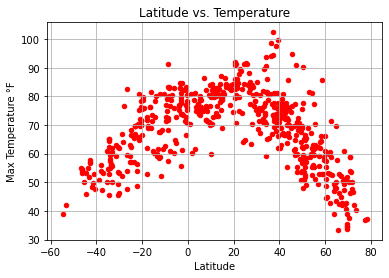

In [14]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission


weathermap_df.plot(kind = "scatter", x = "Lat", y = "Max Temp", marker='o', color='red')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.title("Latitude vs. Temperature")
plt.grid(True)
plt.tight_layout
plt.show
plt.savefig("graphs/Latitude_vs_Temperature_Plot.png")

## Latitude vs. Humidity Plot

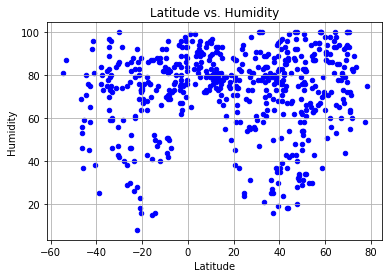

In [15]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission

weathermap_df.plot(kind = "scatter", x = "Lat", y = "Humidity", marker='o', color='blue')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")
plt.grid(True)
plt.tight_layout
plt.show
plt.savefig("graphs/Latitude_vs_Humidity_Plot.png")

## Latitude vs. Cloudiness Plot

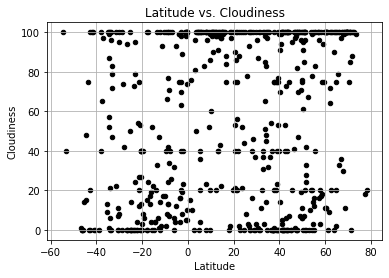

In [16]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission

weathermap_df.plot(kind = "scatter", x = "Lat", y = "Cloudiness", marker='o', color='black')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")
plt.grid(True)
plt.tight_layout
plt.show
plt.savefig("graphs/Latitude_vs_Cloudiness_Plot.png")

## Latitude vs. Wind Speed Plot

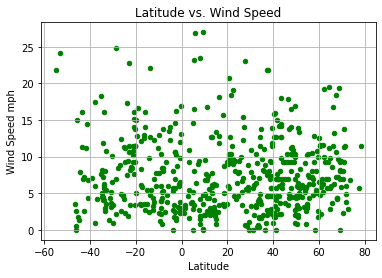

In [17]:
##matplotlib day 1 activities 11&12
## remember to save the figure for submission

weathermap_df.plot(kind = "scatter", x = "Lat", y = "Wind Speed", marker='o', color='green')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed mph")
plt.title("Latitude vs. Wind Speed")
plt.grid(True)
plt.tight_layout
plt.show
plt.savefig("graphs/Latitude_vs_Wind_Speed_Plot.png")

## Linear Regression

In [18]:
##create a linear regression function if possible
## use the code from MatPlotLib day 3 activity 8
## from the linregress call to plt.show() can be ran as a single function
## passing in the x_values, y_values, title and where you want the formula to show up
## remember to put a little comment about the charts as you go.

#separating hemispheres by those above 0 and below 0
northern_hemisphere_df = weathermap_df.loc[weathermap_df["Lat"] >= 0]
southern_hemisphere_df = weathermap_df.loc[weathermap_df["Lat"] < 0]
#not sure how to differentiate northern hemisphere from southern hemisphere equally without leaving out cities with 0 latitude.
#arbitrarily chose northern hemisphere to contain cities with latitude = 0

slope_n = []
slope_s = []
intercept_n = []
intercept_s = []
r_value_n = []
r_value_s = []
regression_n = []
regression_s = []

#Based on assignment readme: Temperature, Humidity, Cloudiness, and Wind Speed vs Latitude linear regression is needed
column_name = ("Max Temp", "Humidity", "Cloudiness", "Wind Speed")
for names in column_name:
    #looping through northern hemisphere df
    x_axis_n = northern_hemisphere_df['Lat']
    y_axis_n = northern_hemisphere_df[names]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_n, y_axis_n)
    #y = mx + b
    regression_n_loop = x_axis_n * slope + intercept
    #**2 squares value
    r_sq_n = rvalue**2
    #appending values to the northern hemisphere lists that will be used to plot regression lines
    slope_n.append(slope)
    intercept_n.append(intercept)
    r_value_n.append(r_sq_n)
    regression_n.append(regression_n_loop)
    

for names in column_name:
    #looping through southern hemisphere df
    x_axis_s = southern_hemisphere_df['Lat']
    y_axis_s = southern_hemisphere_df[names]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_s, y_axis_s)
    #y = mx + b
    regression_s_loop = x_axis_s * slope + intercept
    r_sq_s = rvalue**2
    #appending values to the southern hemisphere lists that will be used to plot regression lines
    slope_s.append(slope)
    intercept_s.append(intercept)
    r_value_s.append(r_sq_s)
    regression_s.append(regression_s_loop)




In [19]:
#cleaned dataframe that lists slopes, intercepts, and r² values for Temperature, Humidity, Cloudiness, and Wind Speed metrics.
hemisphere_n_clean_df = pd.DataFrame(
    {"North Slope": slope_n,
    "North Intercepts": intercept_n,
    "North R Squared": r_value_n},
    ['Max Temp','Humidity','Cloudiness','Wind Speed']
    )

hemisphere_s_clean_df = pd.DataFrame(
    {"South Slope": slope_s,
    "South Intercepts": intercept_s,
    "South R Squared": r_value_s},
    ['Max Temp','Humidity','Cloudiness','Wind Speed']
    )


In [20]:
#testing to see if the dataframes look as intended
#hemisphere_n_clean_df
hemisphere_s_clean_df

,South Slope,South Intercepts,South R Squared
Max Temp,0.603536,78.361949,0.552834
Humidity,0.246950,74.889441,0.030199
Cloudiness,0.328765,48.226746,0.013080
Wind Speed,-0.030217,7.117784,0.006589


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Max Temp vs. Latitude is 0.5155656284618433


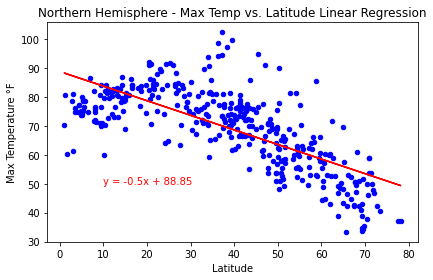

<Figure size 432x288 with 0 Axes>

In [29]:
## filter your main dataframe where LAT>0 for Northern, LAT<0 for Southern hemispheres

#index 0 = max temp

#defining the northern regression scatter plot graph and creating a regression line
northern_hemisphere_df.plot.scatter(x = "Lat", y = "Max Temp", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Northern Hemisphere - Max Temp vs. Latitude is {r_value_n[0]}')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_n[0], 2)) + "x + " + str(round(intercept_n[0], 2))
plt.annotate(line_equation, (10,50), color = "red")
plt.plot(x_axis_n, regression_n[0], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Northern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Max Temp vs. Latitude is 0.5528340198927051


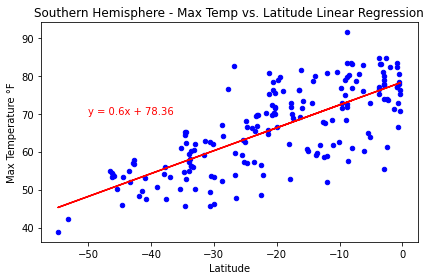

<Figure size 432x288 with 0 Axes>

In [31]:
#defining the southern regression scatter plot graph and creating a regression line
southern_hemisphere_df.plot.scatter(x = "Lat", y = "Max Temp", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Southern Hemisphere - Max Temp vs. Latitude is {r_value_s[0]}')

plt.xlabel("Latitude")
plt.ylabel("Max Temperature °F")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
#converting slope into a string and rounding its value to 2 decimal places to make it easier to read on the graph
line_equation = "y = " + str(round(slope_s[0], 2)) + "x + " + str(round(intercept_s[0], 2))
plt.annotate(line_equation, (-50,70), color = "red")
plt.plot(x_axis_s, regression_s[0], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Southern_Hemisphere_Latitude_vs_Temperature_Linear_Regression.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Humidity vs. Latitude is 0.007159940021681437


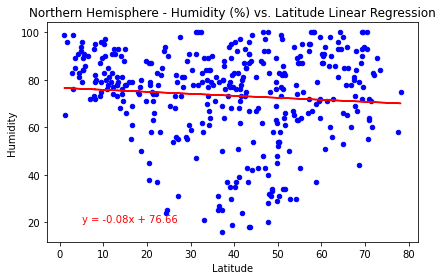

<Figure size 432x288 with 0 Axes>

In [33]:
#index 1 = humidity


northern_hemisphere_df.plot.scatter(x = "Lat", y = "Humidity", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Northern Hemisphere - Humidity vs. Latitude is {r_value_n[1]}')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_n[1], 2)) + "x + " + str(round(intercept_n[1], 2))
plt.annotate(line_equation, (5,20), color = "red")
plt.plot(x_axis_n, regression_n[1], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Northern_Humidity_vs_Latitude_Linear_Regression.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Humidity vs. Latitude is 0.030198956792207153


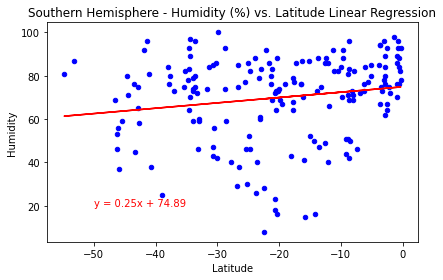

<Figure size 432x288 with 0 Axes>

In [34]:
southern_hemisphere_df.plot.scatter(x = "Lat", y = "Humidity", marker="o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Southern Hemisphere - Humidity vs. Latitude is {r_value_s[1]}')

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_s[1], 2)) + "x + " + str(round(intercept_s[1], 2))
plt.annotate(line_equation, (-50,20), color = "red")
plt.plot(x_axis_s, regression_s[1], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Southern_Humidity_vs_Latitude_Linear_Regression.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Cloudiness vs. Latitude is 5.109599937440283e-05


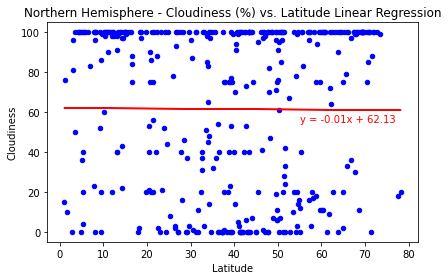

<Figure size 432x288 with 0 Axes>

In [35]:
#index 2 = cloudiness

northern_hemisphere_df.plot.scatter(x = "Lat", y = "Cloudiness", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Northern Hemisphere - Cloudiness vs. Latitude is {r_value_n[2]}')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_n[2], 2)) + "x + " + str(round(intercept_n[2], 2))
plt.annotate(line_equation, (55,55), color = "red")
plt.plot(x_axis_n, regression_n[2], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Northern_Cloudiness_vs_Latitude_Linear_Regression.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Cloudiness vs. Latitude is 0.013080327976904461


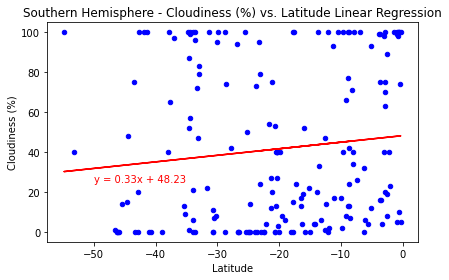

<Figure size 432x288 with 0 Axes>

In [36]:
southern_hemisphere_df.plot.scatter(x = "Lat", y = "Cloudiness", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Southern Hemisphere - Cloudiness vs. Latitude is {r_value_s[2]}')

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_s[2], 2)) + "x + " + str(round(intercept_s[2], 2))
plt.annotate(line_equation, (-50,25), color = "red")
plt.plot(x_axis_s, regression_s[2], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Southern_Cloudiness_vs_Latitude_Linear_Regression.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value of Northern Hemisphere - Wind Speed vs. Latitude is 0.002803022873575729


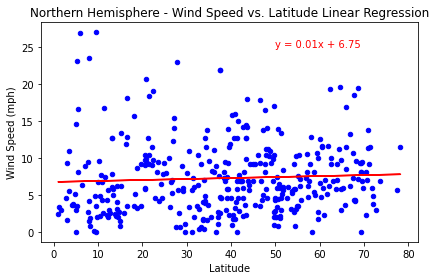

<Figure size 432x288 with 0 Axes>

In [37]:
#index 3 = wind speed

northern_hemisphere_df.plot.scatter(x = "Lat", y = "Wind Speed", marker="o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Northern Hemisphere - Wind Speed vs. Latitude is {r_value_n[3]}')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_n[3], 2)) + "x + " + str(round(intercept_n[3], 2))
plt.annotate(line_equation, (50,25), color = "red")
plt.plot(x_axis_n, regression_n[3], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Northern_Wind_Speed_vs_Latitude_Linear_Regression.png')


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value of Southern Hemisphere - Wind Speed vs. Latitude is 0.006588614419802226


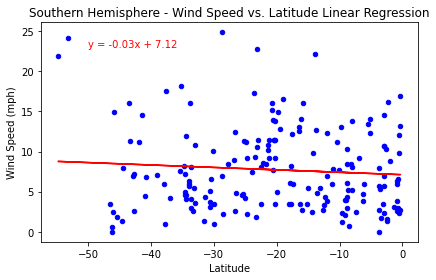

<Figure size 432x288 with 0 Axes>

In [38]:
southern_hemisphere_df.plot.scatter(x = "Lat", y = "Wind Speed", marker = "o", color = "blue")

#prints the r-value of this line
print(f'The r-value of Southern Hemisphere - Wind Speed vs. Latitude is {r_value_s[3]}')

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
line_equation = "y = " + str(round(slope_s[3], 2)) + "x + " + str(round(intercept_s[3], 2))
plt.annotate(line_equation, (-50,23), color = "red")
plt.plot(x_axis_s, regression_s[3], "red")
plt.tight_layout()
plt.show()
plt.savefig('graphs/Southern_Wind_Speed_vs_Latitude_Linear_Regression.png')
